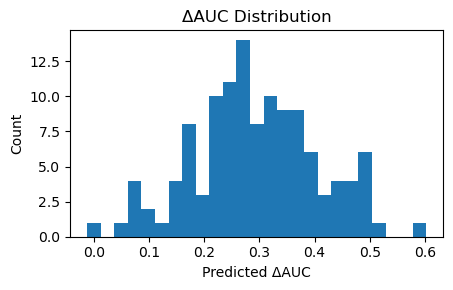

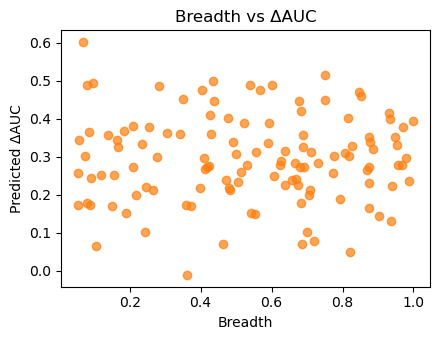

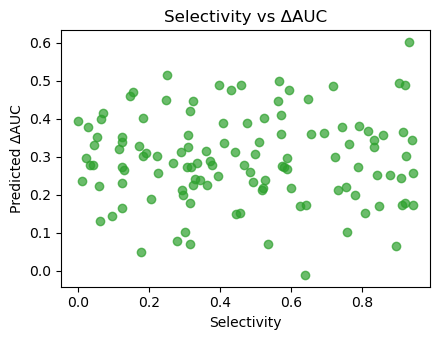

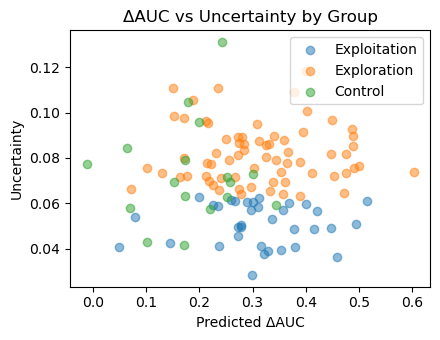

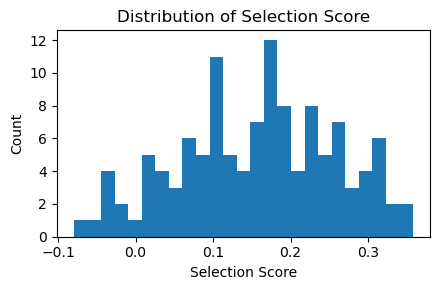

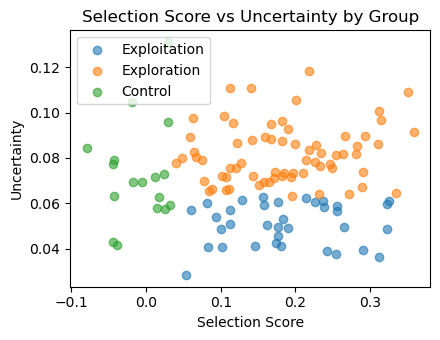

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# -----------------------------
# Demo prediction data
# -----------------------------
n_pairs = 120
n_models = 8

true_signal = np.random.normal(0.3, 0.12, n_pairs)
ensemble_preds = np.array([true_signal + np.random.normal(0, 0.08, n_pairs) for _ in range(n_models)])

mean_pred = ensemble_preds.mean(axis=0)
std_pred = ensemble_preds.std(axis=0)

breadth = np.random.uniform(0.05, 1.0, n_pairs)
selectivity = 1 - breadth

df = pd.DataFrame({
    "delta_auc": mean_pred,
    "uncertainty": std_pred,
    "breadth": breadth,
    "selectivity": selectivity
})

# -----------------------------
# Compute selection score and assign groups
# -----------------------------
df["selection_score"] = 0.5 * df["delta_auc"] + 0.3 * df["breadth"] - 0.2 * np.exp(-df["uncertainty"]*4)

df["group"] = "Exploration"
df.loc[df["uncertainty"] < np.percentile(df["uncertainty"], 33), "group"] = "Exploitation"
df.loc[df["selection_score"].rank(pct=True) < 0.15, "group"] = "Control"

# -----------------------------
# Define consistent colors
# -----------------------------
colors = {"Exploitation": "#1f77b4",  # blue
          "Exploration": "#ff7f0e",  # orange
          "Control": "#2ca02c"}      # green

# -----------------------------
# Plot 1 — ΔAUC distribution
# -----------------------------
plt.figure(figsize=(4.5,3))
plt.hist(df["delta_auc"], bins=25, color="#1f77b4")  # blue
plt.xlabel("Predicted ΔAUC")
plt.ylabel("Count")
plt.title("ΔAUC Distribution")
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 2 — Breadth vs ΔAUC
# -----------------------------
plt.figure(figsize=(4.5,3.5))
plt.scatter(df["breadth"], df["delta_auc"], alpha=0.7, color="#ff7f0e")  # orange
plt.xlabel("Breadth")
plt.ylabel("Predicted ΔAUC")
plt.title("Breadth vs ΔAUC")
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 3 — Selectivity vs ΔAUC
# -----------------------------
plt.figure(figsize=(4.5,3.5))
plt.scatter(df["selectivity"], df["delta_auc"], alpha=0.7, color="#2ca02c")  # green
plt.xlabel("Selectivity")
plt.ylabel("Predicted ΔAUC")
plt.title("Selectivity vs ΔAUC")
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 4 — ΔAUC vs Uncertainty by group
# -----------------------------
plt.figure(figsize=(4.5,3.5))
for g, color in colors.items():
    subset = df[df["group"] == g]
    plt.scatter(subset["delta_auc"], subset["uncertainty"], label=g, alpha=0.5, color=color)

plt.xlabel("Predicted ΔAUC")
plt.ylabel("Uncertainty")
plt.title("ΔAUC vs Uncertainty by Group")
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 5 — Selection Score distribution
# -----------------------------
plt.figure(figsize=(4.5,3))
plt.hist(df["selection_score"], bins=25, color="#1f77b4")  # blue
plt.xlabel("Selection Score")
plt.ylabel("Count")
plt.title("Distribution of Selection Score")
plt.tight_layout()
plt.show()

# -----------------------------
# Plot 6 — Selection Score vs Uncertainty by group
# -----------------------------
plt.figure(figsize=(4.5,3.5))
for g, color in colors.items():
    subset = df[df["group"] == g]
    plt.scatter(subset["selection_score"], subset["uncertainty"], label=g, alpha=0.6, color=color)

plt.xlabel("Selection Score")
plt.ylabel("Uncertainty")
plt.title("Selection Score vs Uncertainty by Group")
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px

np.random.seed(42)

# -----------------------------
# Demo prediction data
# -----------------------------
n_pairs = 120
n_models = 8

true_signal = np.random.normal(0.3, 0.12, n_pairs)
ensemble_preds = np.array([true_signal + np.random.normal(0, 0.08, n_pairs) for _ in range(n_models)])

mean_pred = ensemble_preds.mean(axis=0)
std_pred = ensemble_preds.std(axis=0)

breadth = np.random.uniform(0.05, 1.0, n_pairs)
selectivity = 1 - breadth

df = pd.DataFrame({
    "delta_auc": mean_pred,
    "uncertainty": std_pred,
    "breadth": breadth,
    "selectivity": selectivity
})

# -----------------------------
# Compute selection score and assign groups
# -----------------------------
df["selection_score"] = 0.5 * df["delta_auc"] + 0.3 * df["breadth"] - 0.2 * np.exp(-df["uncertainty"]*4)

df["group"] = "Exploration"
df.loc[df["uncertainty"] < np.percentile(df["uncertainty"], 33), "group"] = "Exploitation"
df.loc[df["selection_score"].rank(pct=True) < 0.15, "group"] = "Control"

# -----------------------------
# Interactive Plotly scatter with black fonts
# -----------------------------
fig = px.scatter(
    df,
    x="selection_score",
    y="uncertainty",
    color="group",
    hover_data=["delta_auc", "breadth", "selectivity", "selection_score"],
    title="Selection Score vs Uncertainty by Group",
    labels={"selection_score": "Selection Score", "uncertainty": "Model Uncertainty (σ)"},
    width=700, height=500
)

# Update layout: larger font size + black color
fig.update_layout(
    font=dict(size=16, color="black"),          # axis ticks + legend
    title_font=dict(size=20, color="black"),    # title
    legend=dict(font=dict(size=14, color="black"))
)

# Show in iframe
fig.show(renderer="iframe")

# -----------------------------
# Save high-resolution image
# -----------------------------
fig.write_image("selection_score_vs_uncertainty.png", width=1400, height=1000, scale=3)